In [65]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Data Loading and Visualization

In [61]:
# Read salary data
file_path = Path("Resources/global-data-on-sustainable-energy (1).csv")
df_energy = pd.read_csv(file_path)

# Display sample data
df_energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [63]:
df_renewable_country = df_energy[df_energy["Entity"] == 'Australia']

columns_to_clean = ["Electricity from renewables (TWh)"]
df_renewable_country_cleaned = df_renewable_country.dropna(subset=columns_to_clean)

df_renewable_country_cleaned ['Year'].unique()


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

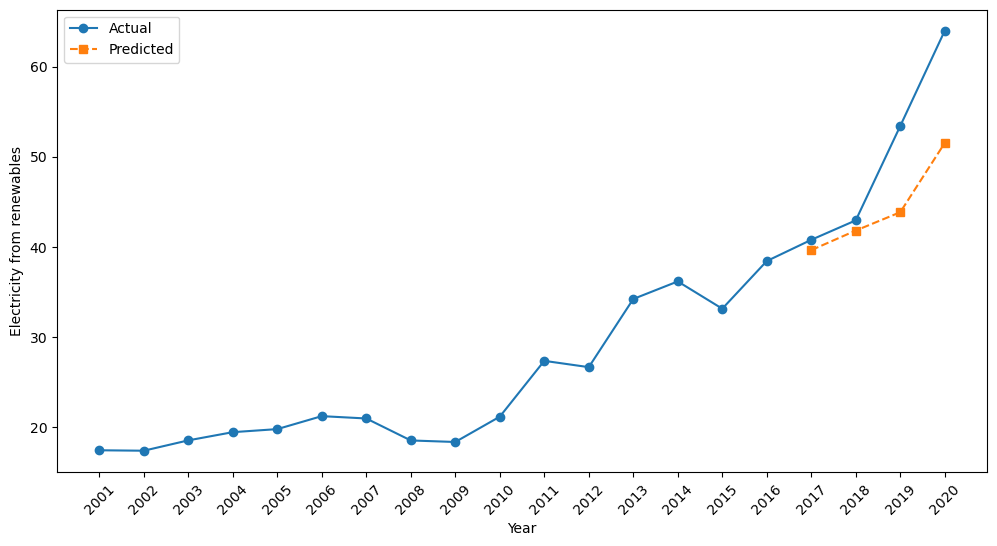

In [64]:
# Feature engineering (adding lag features)
df_renewable_country_cleaned['renewable_lag_1'] = df_renewable_country_cleaned['Electricity from renewables (TWh)'].shift(1)

df_renewable_country_cleaned = df_renewable_country_cleaned[1:]

# Split data into training and testing sets
train_data, test_data = train_test_split(df_renewable_country_cleaned, test_size=0.2, shuffle=False)

# Create feature matrix and target variable
X_train = train_data[['Year', 'renewable_lag_1']].values
y_train = train_data['Electricity from renewables (TWh)'].values

X_test = test_data[['Year', 'renewable_lag_1']].values
y_test = test_data['Electricity from renewables (TWh)'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualization
x_values = df_renewable_country_cleaned['Year']

plt.figure(figsize=(12, 6))
plt.plot(df_renewable_country_cleaned['Year'], df_renewable_country_cleaned['Electricity from renewables (TWh)'], label='Actual', marker='o')
plt.plot(test_data['Year'], y_pred, label='Predicted', linestyle='dashed', marker='s')
plt.xlabel('Year')
plt.ylabel('Electricity from renewables')
plt.legend()
plt.xticks(x_values, rotation=45) # Rotate the labels for better visibility
plt.show()

In [66]:
X_test

array([[2017.  ,   38.41],
       [2018.  ,   40.77],
       [2019.  ,   42.93],
       [2020.  ,   53.41]])

X_test = pd.DataFrame(X_test)
y_test

In [67]:
# Compute the metrics for the linear regression model
score = model.score(X_train, y_train, sample_weight=None)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)



# Define variables for adjusted r2
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = len(X_test.columns)




# Calculate adjusted r2 score
adj_r2_score = 1 - (1-r2)*((n-1)/(n-k-1))


In [68]:


# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")
#print(f"The adjusted r2 score is {adj_r2_score}.")


The score is 0.8790588337259458.
The r2 is 0.26831800363056457.
The mean squared error is 62.41201254375181.
The root mean squared error is 7.90012737515996.
The standard deviation is 9.249641884959654.
